# Start-up

In [1]:
import sys
import time
from numpy import *
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
# from redpitaya_scpi import scpi
# if ".\\remote_control" not in sys.path:
#     sys.path.append(".\\remote_control")
from control_hugo import red_pitaya_control,red_pitaya_app
# from read_dump import read_dump

AppName = "lock_in+pid_for_qudi"
rp_ip = 'rp-f0a83e.local'
port = 22
filename = "test.npz"
pwd = 'quantuM2015'

rp=red_pitaya_app(AppName=AppName,host=rp_ip,port=port,filename=filename,password=pwd)

auth method: pass
Remote Command: uname -a
Remote Command: echo $SSH_CONNECTION
Error detecting local IPv4 address: str, bytes or bytearray expected, not NoneType
rp.osc.load(): /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc.py
Remote Command: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc.py
rp.lock_in+pid_for_qudi.load(): /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/lock.py
Remote Command: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/lock.py
Remote Command: cat /opt/redpitaya/www/apps/lock_in+pid_for_qudi/index.html
Remote Command: /opt/redpitaya/bin/calib -r -v


In [1]:
rp.ssh.close()

NameError: name 'rp' is not defined

In [4]:
print(rp.check_connection())

Remote Command: uname -a
Remote Command: echo $SSH_CONNECTION
True


# Example

In [ ]:
import logging
logging.basicConfig()
logging.getLogger("paramiko").setLevel(logging.WARNING)
rp.verbose = False

In [ ]:
# Set params
rp.lock.ramp_step = 1000
rp.lock.ramp_low_lim = 0
rp.lock.ramp_hig_lim = 8191
rp.lock.ramp_enable = 1
rp.lock.out2_sw = 12

rp.lock.oscA_sw = 1
rp.lock.oscB_sw = 2
rp.lock.trig_sw = 8

rp.get_adc_dac_calib()

trigger_type = 6  # 6 is external, 1 is manual

In [ ]:
# Decimation only allows this values: 1,8,64, 1024, 8192, 65536
# The oscilloscope data points will be separated by 2^(dec-1) * 8 ns
dec = 1 # [1,8,64, 1024, 8192, 65536]

rp.osc_trig_fire(trig=trigger_type,dec=dec)
sleep(dec *8e-9*2**14 + 0.2)
rp.get_curv(log='ruido info' )

rp.save()

In [ ]:
# Access last acquisition values
ch1_val = mean( rp.data[-1][2]['ch1'])
ch1_err =  std( rp.data[-1][2]['ch1'])

ch2_val = mean( rp.data[-1][2]['ch2'])
ch2_err =  std( rp.data[-1][2]['ch2'])

ch1_act = (ch1_val + rp.calib_params['FE_CH1_DC_offs'])*float(rp.calib_params['FE_CH1_FS_G_HI'])/2**32*100/8192
ch2_act = (ch2_val + rp.calib_params['FE_CH2_DC_offs'])*float(rp.calib_params['FE_CH2_FS_G_HI'])/2**32*100/8192


In [ ]:
# plot last acquisition
rp.plot(num=0)

In [ ]:
rp.get_adc_dac_calib()

print(repr(rp.calib_params))

In [ ]:
rp.plot(num=1)

In [ ]:
rp.plot(num=-1)

# Test Real-time acquisition

## Single acquisitions

In [ ]:
rp.get_curv()

In [ ]:
len(rp.data)

In [ ]:
latest_acq = rp.data[-1]
latest_acq_number = latest_acq[0]
latest_acq_time = latest_acq[1]
latest_acq_data = latest_acq[2]
print("Acq_num: ",latest_acq_number,"  | Timestamp: ",datetime.fromtimestamp(latest_acq_time))

In [ ]:
t_idx = latest_acq_data['i']
print("Time data: ",t_idx)

In [ ]:
ch1 = latest_acq_data['ch1']
print("Ch. 1 data: ",ch1)

In [ ]:
ch2 = latest_acq_data['ch2']
print("Ch. 2 data: ",ch2)

In [ ]:
dec = latest_acq_data['dec']
tau = 8*2**latest_acq_data['dec']
t = [x * tau for x in t_idx]
print(t)

In [ ]:
print("dec:",dec,"=> Tau: ",tau,"ns")

In [ ]:
plt.plot(t,ch1)
plt.plot(t,ch2)

## Stream

In [ ]:
# Start streaming specific signals
rp.start_streaming(signals='in1 in2')

# Collect data for a while (e.g., 10 seconds)
time.sleep(10)

# Stop streaming when done
rp.stop_streaming()

# The streamed data will be saved to a file (e.g., 'timestamp_dump.bin').
# You can process this file in real-time or after the acquisition.


Getting streaming for [in1 in2]
start_streaming(): Getting streaming for [in1 in2]
start_streaming():
rp_ip: 134.60.243.125
local_ip:  134.60.243.151 

cmd:  /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/data_dump.py  -s 134.60.243.151 -p 6000 --params in1 in2 

start_streaming(): filename=20250204_143611_dump.bin
remote: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/data_dump.py  -s 134.60.243.151 -p 6000 --params in1 in2


In [ ]:
rp.stop_streaming()

In [3]:
d = read_dump(filename=sys.path[0]+'/20250130_155801_dump.bin', head1_size=100, head2_size=3400)
d.load_params()
d.load_range(start=0,end=-1)

running first: self.time_stats()
Load time   : 0.000000 sec
Data length : 3329
Last time   : 9.617266 sec
Max dt      : 0.010448 sec
Min dt      : 0.002770 sec
autoset: end=3330, step=1
Load time: 0.000000 sec


In [33]:
print(d.params)

{'oscA_sw': 0.0, 'oscB_sw': 0.0, 'osc_ctrl': 0.0, 'trig_sw': 0.0, 'out1_sw': 0.0, 'out2_sw': 0.0, 'slow_out1_sw': 0.0, 'slow_out2_sw': 0.0, 'slow_out3_sw': 0.0, 'slow_out4_sw': 0.0, 'lock_control': 0.0, 'lock_feedback': 0.0, 'lock_trig_val': 0.0, 'lock_trig_time': 0.0, 'lock_trig_sw': 0.0, 'rl_error_threshold': 0.0, 'rl_signal_sw': 0.0, 'rl_signal_threshold': 0.0, 'rl_config': 0.0, 'rl_state': 0.0, 'sf_jumpA': 0.0, 'sf_jumpB': 0.0, 'sf_config': 0.0, 'signal_sw': 0.0, 'signal_i': 0.0, 'sg_amp1': 0.0, 'sg_amp2': 0.0, 'sg_amp3': 0.0, 'sg_amp_sq': 0.0, 'lpf_F1': 0.0, 'lpf_F2': 0.0, 'lpf_F3': 0.0, 'lpf_sq': 0.0, 'error_sw': 0.0, 'error_offset': 0.0, 'error': 0.0, 'error_mean': 0.0, 'error_std': 0.0, 'gen_mod_phase': 0.0, 'gen_mod_phase_sq': 0.0, 'gen_mod_hp': 0.0, 'gen_mod_sqp': 0.0, 'ramp_A': 0.0, 'ramp_B': 0.0, 'ramp_step': 0.0, 'ramp_low_lim': 0.0, 'ramp_hig_lim': 0.0, 'ramp_reset': 0.0, 'ramp_enable': 0.0, 'ramp_direction': 0.0, 'ramp_B_factor': 0.0, 'sin_ref': 0.0, 'cos_ref': 0.0, 'cos

In [5]:
print(d.data)

[[0.00000000e+00 2.01406479e-02 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.31370926e-02 0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 2.60522366e-02 0.00000000e+00 0.00000000e+00]
 ...
 [3.32600000e+03 9.61143780e+00 0.00000000e+00 0.00000000e+00]
 [3.32700000e+03 9.61436367e+00 0.00000000e+00 0.00000000e+00]
 [3.32800000e+03 9.61726570e+00 0.00000000e+00 0.00000000e+00]]


In [6]:
column = [row[1] for row in d.data]
print(column)

[0.020140647888183594, 0.02313709259033203, 0.026052236557006836, 0.029003143310546875, 0.03191494941711426, 0.03480100631713867, 0.03770613670349121, 0.04059743881225586, 0.04349207878112793, 0.04638481140136719, 0.0493311882019043, 0.05223989486694336, 0.05512881278991699, 0.0580141544342041, 0.060915231704711914, 0.06380891799926758, 0.06670260429382324, 0.06964802742004395, 0.07260894775390625, 0.07550835609436035, 0.07840418815612793, 0.08131146430969238, 0.08421564102172852, 0.08709836006164551, 0.09005928039550781, 0.09294486045837402, 0.0958402156829834, 0.09872579574584961, 0.10165739059448242, 0.1045522689819336, 0.10743331909179688, 0.11037564277648926, 0.1132652759552002, 0.11614584922790527, 0.11907291412353516, 0.12200736999511719, 0.12491869926452637, 0.12781524658203125, 0.13071250915527344, 0.13359475135803223, 0.1364758014678955, 0.13941478729248047, 0.14232087135314941, 0.14519858360290527, 0.14808440208435059, 0.1509854793548584, 0.15387797355651855, 0.1567642688751

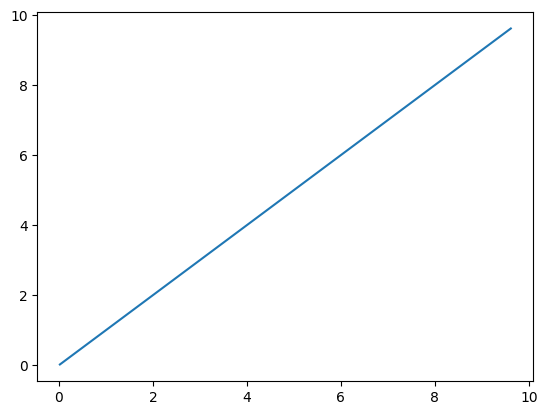

In [7]:
plt.plot(d.t,column)

In [2]:
import numpy as np

In [10]:
# Generate the first column: count from 0 to 100000 in steps of 8
column1 = np.arange(0, 100001, 8)

# Generate the second column: random floats between -0.5 and 0.5
column2 = np.random.uniform(-0.5, 0.5, len(column1))

# Combine them into a 2D array
array = np.column_stack((column1, column2))

In [15]:
print(column1)

[     0      8     16 ...  99984  99992 100000]


In [14]:
print(column2)

[-0.38942196 -0.25992059 -0.23098413 ...  0.34964856  0.13363043
 -0.14919884]


In [20]:
array[:, 0]

array([0.0000e+00, 8.0000e+00, 1.6000e+01, ..., 9.9984e+04, 9.9992e+04,
       1.0000e+05])

In [1]:
import random

In [5]:
column1 = [i * 0.000008 for i in range(int(100 / 0.008))]  # Generate values from 0 to 100

# Generate the second column: random floats between -0.5 and 0.5
column2 = [random.uniform(-0.5, 0.5) for _ in range(len(column1))]

# Combine them into a list of tuples
data = list(zip(column1, column2))

In [6]:
len(column1)

12500

In [7]:
len(column2)

12500